In [2]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline

import warnings
warnings.filterwarnings('ignore')

about the dataset:
- domestic flights in india 
- 300153 rows and 11 columns
- 69% of the flights are Economy class, 31% is Business class
- 12% of tha flights are direct flights
- there is 0 Nan values 
- days_left column refers to how many days the ticket was booked before departure 
- a new column is created to show the route of the flight
- a new column is created to show the direct and non-direct flights

Q1. How is the price affected when tickets are bought in just 1 or 2 days before departure?
For economy class flights the prices is about 208% higher  if you book the ticket 1 or 2 days before departure!
for business class flights the prices is about 27.5% higher if you book the ticket 1 or 2 days before departure!



In [3]:
df = pd.read_csv('clean_dataset.csv', index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [244]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
trip                0
dtype: int64

In [214]:
df.shape


(300153, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [215]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [17]:
df.flight.unique().size

1561

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
flight,,,,,,,,,,
6E-102,39,39,39,39,39,39,39,39,39,39
6E-105,5,5,5,5,5,5,5,5,5,5
6E-113,49,49,49,49,49,49,49,49,49,49
6E-121,20,20,20,20,20,20,20,20,20,20
6E-123,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...
UK-988,1381,1381,1381,1381,1381,1381,1381,1381,1381,1381
UK-993,911,911,911,911,911,911,911,911,911,911
UK-994,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273


In [224]:
df['trip']= df['source_city']+'-'+df['destination_city']
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,trip
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai-Hyderabad
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai-Hyderabad
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai-Hyderabad
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai-Hyderabad


In [251]:
eco= df[df['class']=='Business']
eco.groupby(['days_left'],as_index=False).price.mean()

,days_left,price
0,1,65169.312030
1,2,60455.848506
2,3,60313.822331
3,4,56120.287087
4,5,56149.915397
5,6,53643.310488
6,7,54501.171604
7,8,53224.650386
8,9,52981.195297
9,10,54247.303856


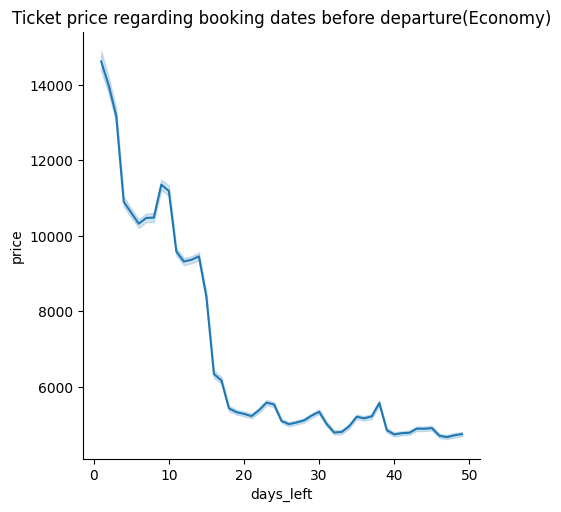

In [246]:
eco= df[df['class']=='Economy']
fig= sns.relplot(data=eco,
                 x= 'days_left',
                 y= 'price',
                 kind='line',
                 ).set(title='Ticket price regarding booking dates before departure(Economy)')
fig

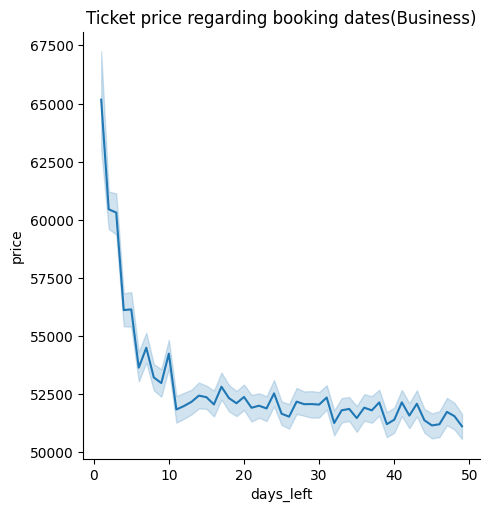

In [219]:
business= df[df['class']=='Business']
fig= sns.relplot(data=business,
                 x= 'days_left',
                 y= 'price',
                 kind='line',
                 ).set(title='Ticket price regarding booking dates(Business)')
fig

In [226]:
eco1= df[df['class']=='Economy'].query('days_left<= 2')
eco2= df[df['class']=='Economy'].query('days_left>= 15')
ww1=eco1.groupby(['trip','airline'],as_index=False).price.mean()
ww2=eco2.groupby(['trip','airline'],as_index=False).price.mean()
df1=pd.DataFrame(ww1)
df2=pd.DataFrame(ww2)
final_df= pd.merge(df1,df2,on=['trip','airline'])
final_df.rename(columns={'price_x':'price_1or2','price_y':'price_normal'}, inplace=True)
final_df['price_dif']= final_df['price_1or2']-final_df['price_normal']
final_df['dif_perc']= (final_df.price_dif/final_df.price_normal)*100
final_df

,trip,airline,price_1or2,price_normal,price_dif,dif_perc
0,Bangalore-Chennai,AirAsia,3499.000000,1753.849558,1745.150442,99.503999
1,Bangalore-Chennai,Air_India,15863.864865,5948.607978,9915.256887,166.681969
2,Bangalore-Chennai,Indigo,6219.333333,1865.893023,4353.440310,233.316715
3,Bangalore-Chennai,SpiceJet,3497.000000,1915.411765,1581.588235,82.571709
4,Bangalore-Chennai,Vistara,16443.543478,6283.952747,10159.590732,161.675161
...,...,...,...,...,...,...
160,Mumbai-Kolkata,Air_India,12678.227273,5459.583893,7218.643380,132.219662
161,Mumbai-Kolkata,GO_FIRST,9624.928571,5713.260776,3911.667796,68.466467
162,Mumbai-Kolkata,Indigo,17196.105263,5619.178744,11576.926519,206.025240
163,Mumbai-Kolkata,SpiceJet,12954.576923,6352.930836,6601.646087,103.914969


In [275]:
def economy(trip):
        eco= df[df['class']=='Economy'].query(f'trip=="{trip}"')
        busi= eco.groupby(['days_left','airline'],as_index=False).price.mean()
        fig= px.line(busi,
                x= 'days_left',
                y= 'price',
                color= 'airline',
                title= f'({trip})'+ ' '+'Price Variation between airlines regarding booking dates (Economy)'
                )
        fd= final_df.query(f'trip=="{trip}"')
        g1= go.Bar(
                x=fd.airline,
                y=fd.price_1or2,
                name='Last minute ticket',
                text=fd.price_1or2,
                textposition='outside',
                texttemplate= '%{y:.2f}'
                
        )
        g2= go.Bar(
                x=fd.airline,
                y=fd.price_normal,
                name='normal Ticket',
                text=fd.price_normal,
                textposition='outside',
                texttemplate= '%{y:.2f}'
        )
        data=[g1,g2]
        layout= go.Layout(title= F'({trip})' + ' '+ 'Price differences between normal tickets and last minute tickets (Economy)')
        figu= go.Figure(data=data, layout=layout)


        per= px.bar(fd,
        y='dif_perc',
        x='airline',
        text='dif_perc',
        title=f'''({trip}) difference percentage between last minute tickets VS normal tickets(Economy) '''
                )
        per.update_traces(textposition='outside',texttemplate= '%{y:.2f}%')
        return(fig.show(),figu.show(),per.show())
        

In [255]:
# This figure is already plotted with seaborn
ec= df[df['class']=='Economy']
eeco= ec.groupby(['days_left'],as_index=False).price.mean()
px.line(eeco,
        x= 'days_left',
        y= 'price',
        title='Ticket price regarding booking dates before departure(Economy)'
        )

In [256]:
# This figure is already plotted with seaborn
busin= df[df['class']=='Business']
busi= busin.groupby(['days_left'],as_index=False).price.mean()
px.line(busi,
        x= 'days_left',
        y= 'price',
        title='Ticket price regarding booking dates before departure(Business)'
        )

In [253]:
bus1= df[df['class']=='Business'].query('days_left<= 2')
bus2= df[df['class']=='Business'].query('days_left>= 15')
ww1=bus1.groupby(['trip','airline'],as_index=False).price.mean()
ww2=bus2.groupby(['trip','airline'],as_index=False).price.mean()
df1=pd.DataFrame(ww1)
df2=pd.DataFrame(ww2)
final_df_bus= pd.merge(df1,df2,on=['trip','airline'])
final_df_bus.rename(columns={'price_x':'price_1or2','price_y':'price_normal'}, inplace=True)
final_df_bus['price_dif']= final_df_bus['price_1or2']-final_df_bus['price_normal']
final_df_bus['dif_perc']= (final_df_bus.price_dif/final_df_bus.price_normal)*100
final_df_bus.head(5)


,trip,airline,price_1or2,price_normal,price_dif,dif_perc
0,Bangalore-Chennai,Air_India,64388.550000,56241.775758,8146.774242,14.485272
1,Bangalore-Chennai,Vistara,63168.111111,51305.448842,11862.662269,23.121642
2,Bangalore-Delhi,Air_India,44168.000000,40338.529337,3829.470663,9.493332
3,Bangalore-Delhi,Vistara,63771.104167,50111.111386,13659.992781,27.259409
4,Bangalore-Hyderabad,Air_India,56040.950000,50709.368237,5331.581763,10.513998


In [272]:
def business(trip):
        bus= df[df['class']=='Business'].query(f'trip=="{trip}"')
        busi= bus.groupby(['days_left','airline'],as_index=False).price.mean()
        fig= px.line(busi,
                x= 'days_left',
                y= 'price',
                color= 'airline',
                title= f'({trip})'+ ' '+'Price Variation between airlines regarding booking dates (Business)'
                
                )
        fd= final_df_bus.query(f'trip=="{trip}"')
        g1= go.Bar(
                x=fd.airline,
                y=fd.price_1or2,
                name='last minute Ticket',
                text=fd.price_1or2,
                textposition='outside',
                texttemplate= '%{y:.2f}'
                
        )
        g2= go.Bar(
                x=fd.airline,
                y=fd.price_normal,
                name='normal Ticket',
                text=fd.price_normal,
                textposition='outside',
                texttemplate= '%{y:.2f}'
        )
        data=[g1,g2]
        layout= go.Layout(title= F'({trip})' + ' '+ 'Price differances between normal tickets and last minute tickets (Business)')
        figu= go.Figure(data=data, layout=layout)


        per= px.bar(fd,
        y='dif_perc',
        x='airline',
        text='dif_perc',
        title=f'''({trip}) difference percentage between last minute tickets VS normal tickets(Business) '''
                )
        per.update_traces(textposition='outside',texttemplate= '%{y:.2f}%')
        return(fig.show(),figu.show(),per.show())
        
        


In [276]:
business('Delhi-Mumbai')

(None, None, None)

In [277]:
economy('Delhi-Mumbai')

(None, None, None)